In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift

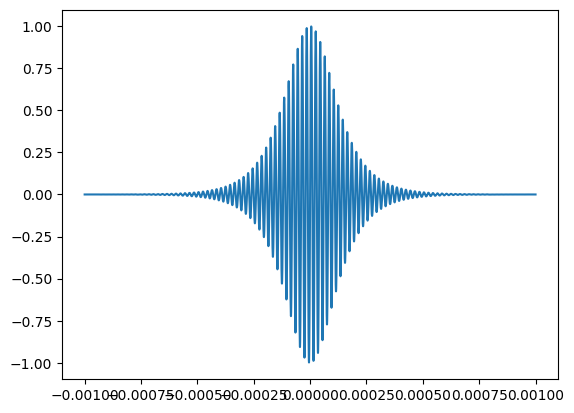

In [36]:
# Pulse Train Definition

beta = 10000
phase = 100000*np.pi
T_prep_single = 2e-3

samples = int(1e4)
t_single = np.linspace(-T_prep_single/2,T_prep_single/2,samples)

a_single = 1/np.cosh(beta*t_single) * np.sin(phase*t_single)

plt.figure()
plt.plot(t_single,a_single)

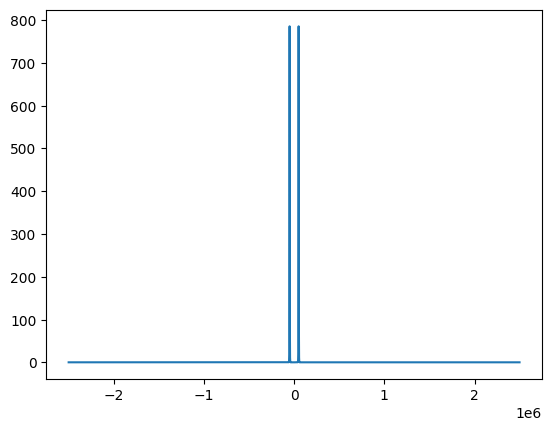

In [37]:
A_single = fftshift(fft(a_single))
f_single = fftshift(fftfreq(n=np.size(a_single), d=T_prep_single/samples))

plt.figure()
plt.plot(f_single,np.abs(A_single))

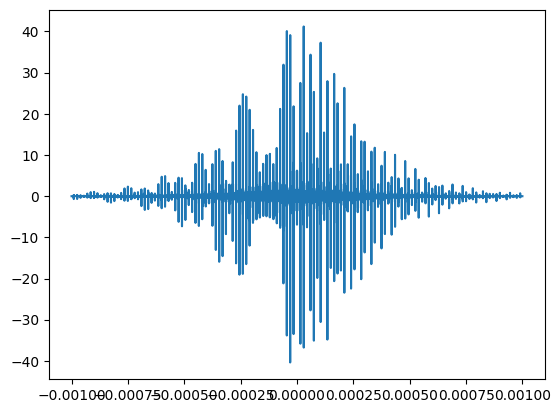

In [50]:
T_prep = 2e-3 # total length of pulse train

t = np.linspace(-T_prep/2,T_prep/2,samples)

beta = 5000
OD = 1
tau = 15e-6 # storage time
Delta = 1/tau # AFC teeth spacing in frequency
N = 50 # Number of teeth
f0 = 494.7258e14 # central frequency of AFC
F_opt = np.pi/(np.arctan(2*np.pi/OD)) # optimal AFC finesse for given storage time
gamma = Delta/F_opt
delta_f = 1e3

A = 1/np.cosh(beta*t) * np.sin(N*np.pi*Delta*t) / np.sin(np.pi*Delta*t) * np.cos(2*np.pi*f0*t + 2*np.pi*gamma/(2*beta)*np.log(np.cosh(beta*t)))

plt.figure()

plt.plot(t,A)

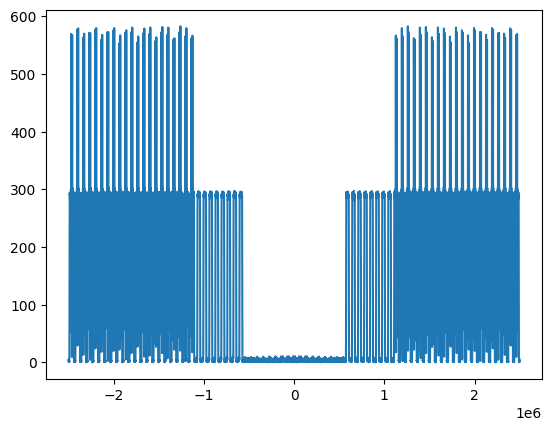

In [51]:
AFC = fftshift(fft(A))
f = fftshift(fftfreq(n=np.size(AFC), d=T_prep/samples))

plt.figure()

plt.plot(f,np.abs(AFC))